# Exercise RL6.1:  SARSA

In this exercise, you will use the temporal-difference learning algorithm SARSA to determine the opimal policy for the Gridworld example used in the previous exercises.

The following code implements the function "env_p" that was already introduced in the previous exercise and imports some necessary python libraries. Please execute the cell.



In [1]:
from matplotlib import pylab as plt
import numpy as np

# 
# define varibles encoding the actions:
# LEFT=0, DOWN=1, RIGHT=2, UP=3
# 
LEFT=0;
DOWN=1;
RIGHT=2;
UP=3;


# 
# Function implemeting the gridworld environment
# 
# Input:
# s: current state
# a: selected action
# 
# Output:
# snext: next state
# r: reward obtained
# goalstate: boolean variable indicating whether snext is the goal state or not
#
# Note that how the function is implemented it can only implement a deterministic environment as it
# returns a definite next state and reward. Probabilistic rewards and state changes are not possible.
#


def env_p(s,a):
    
    r=0
    snext=np.zeros(2).astype(int);
    goalstate=False
    
    # compute next state depeinding on selected action        
    if (a==LEFT):
        snext[0]=s[0]
        snext[1]=s[1]-1        
        
    elif (a==DOWN):
        snext[0]=s[0]+1
        snext[1]=s[1]
            
    elif (a==RIGHT):
        snext[0]=s[0]
        snext[1]=s[1]+1
            
    elif (a==UP):
        snext[0]=s[0]-1
        snext[1]=s[1]

        
    # check whether we hit the lower border of the grid world
    if snext[0]>1:
        snext[0]=1

    # check whether we hit the upper border of the grid world
    if snext[0]<0:
        snext[0]=0            
            
    # check whether we hit the left border of the grid world
    if snext[1]<0:
        snext[1]=0
        
    # check whether we hit the right border of the grid world
    if snext[1]>3:
        snext[1]=3

                        
    # cost of action 
    r=r-1 
            
    # check wether goal state was reached
    if (snext[0]==1) & (snext[1]==3):
        r=r+10 # obtain reward for reaching goal state
        goalstate=True
        
        
    # set reward and state if initial state was already the goal state
    if (s[0]==1) & (s[1]==3):    
        # agent was already in goal state, ignore action
        goalState=True
        r=0
        snext=s

                    
    return snext,r,goalstate

The cell below implements five functions that are used to study SARSA:
- function 'epsilongreedyactionselection' carries out epsilon greedy action selection. As arguments it expects the greedy action and the value of epsilon. It returns the selected action.
- function 'computePolicyfromq' computes and returns the greedy policy from the action-value function q provided as argument.
- function 'SARSA' performs one epsiode of SARSA. As arguments the action-value function q, the learning rate alpha and the exploration parameter epsilon must be provided. The function returns the policy and the action-value function at the end of the epsiode as well as the total reward obtained during the episode.
- function 'showPolicy': this function displays the policy that is provided as argument.
- function 'showActionValueFunction': this function displays the action-value function q that is provided as argument.

Note, that in contrast to previous code the policy is now always deterministic and therefore, the policy arrays are defined as two-dimensional arrays which contain the value of the action for each state.

The action-value function q is realized as a 3-dimensional array. The first two indices identify the state and the third the action, i.e. q[1,1,3] for example gives the value for action 3 (=UP) in state (1,1).  

The function 'SARSA' is missing some lines of code where indicated. Please go to the slides with the SARSA algorithm and complete the code.

Please execute the cell after you added the missing code.

In [2]:
def epsilongreedyactionselection(greedyaction,epsilon):
        
    # epsilon greedy action selection   
    if (np.random.rand()>epsilon):
        a=greedyaction
    else:
        a=np.random.randint(4)        
             
    return a


def computePolicyFromQ(q):
    
    newPolicy=np.zeros([2,4]).astype(int)
    
    for i in range(2):
        for j in range(4):
            newPolicy[i,j]=np.argmax(q[i,j,:])
            
    return newPolicy



def SARSA(q,alpha,epsilon):
    
    maxT = 100 # maximum number of time steps for each episode
    
    s=np.zeros([2,maxT]).astype(int) # visited states
    a=np.zeros(maxT).astype(int) # chosen action    
    r=np.zeros(maxT) # obtained rewards
    
    # run an episode
    goalStateReached=False
    t=0
        
    # compute greedy policy from q
    policy=computePolicyFromQ(q)
    # epsilon greedy action selection for first time step
    a[t]=epsilongreedyactionselection(policy[s[0,t],s[1,t]],epsilon)
                
    while (not goalStateReached) & (t<maxT-1):
        # state transition and reward delivery
        s[:,t+1],r[t],goalStateReached=env_p(s[:,t],a[t])  
        
        # select action in next time step
        ' ========================'
        ' YOUR LINE OF CODE HERE '
        ' ========================'
        a[t+1] = epsilongreedyactionselection(policy[s[0,t+1],s[1,t+1]],epsilon)

        # update action-value function
        ' ========================'
        ' YOUR LINE OF CODE HERE '
        ' ========================'
        
        q[s[0,t],s[1,t],a[t]] = q[s[0,t],s[1,t],a[t]] + alpha * (r[t] + q[s[0,t+1],s[1,t+1],a[t+1]] - q[s[0,t],s[1,t],a[t]])
        
        # policy update            
        policy=computePolicyFromQ(q)
    
        t=t+1
    
    return policy,q,np.sum(r)


def showPolicy(p):
    # translate action number to word: LEFT=0, DOWN=1, RIGHT=2, UP=3
    actionStr=["left","down","right","up"]
    for i in range(2):
        print(actionStr[p[i,0]],actionStr[p[i,1]],actionStr[p[i,2]],actionStr[p[i,3]])

def showActionValueFunction(q):
    for i in range(2):
        for j in range(4):
            print("( ", end='')
            for k in range(4):
                print("%.1f" % (q[i,j,k])," ",end='')
            print(") ", end='')
        print("")

      
        


The next cell is running the SARSA algorithm for 50 consecutive episodes. It prints the initial and final action-value functions and correspoding policies. It further plots a graph showing the reward obtained in an epsiode over the consecutive 50 episodes. The learning rate alpha is set to 0.1 while the exploration parameter epsilon is set to 0.05. Execute the cell and verify that you understand the text and graphical output. Address the following questions:

(1) Does the algorithm converge towards the optimal policy?

(2) What is the reward of the optimal policy? To which reward value does the alogorithm converge to and why is that not identical to the optimal value?



Initial random action-value function and policy:
( 0.4  0.6  0.2  0.5  ) ( 0.0  0.8  0.6  0.3  ) ( 0.4  0.5  0.2  0.5  ) ( 0.9  0.6  0.7  0.3  ) 
( 0.9  0.6  0.2  0.2  ) ( 0.0  0.1  0.9  0.6  ) ( 0.8  0.7  0.9  0.5  ) ( 0.0  0.0  0.0  0.0  ) 
down down down left
left right right left

Final action-value function and policy after 50 episodes:
( -0.4  1.9  -0.3  -0.3  ) ( -0.1  0.4  1.5  0.3  ) ( 0.4  5.3  0.2  0.5  ) ( 1.0  0.6  0.7  0.3  ) 
( 0.1  -0.0  4.7  0.0  ) ( -0.0  1.4  7.4  0.6  ) ( 0.8  0.7  9.0  0.7  ) ( 0.0  0.0  0.0  0.0  ) 
down right down left
right right right left


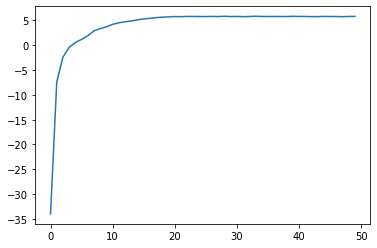

In [3]:
      
NE=50        # number of epsiodes
NR=1000      # number repetitions of the simulation

# alpha/epsilon parameter values 
alpha=[0.1]
epsilon=[0.05]

def sarsaSimulation (alpha,epsilon,NE,NR):
    # total reward obtained (epsiode x parameter set x repetition)
    Repisode=np.zeros([NE,len(alpha),NR])


    for j in range(len(alpha)):

        for i in range(NR):

            q=np.random.rand(2,4,4)
            q[1,3,:]=0

            policy=computePolicyFromQ(q)

            # output only in first repetition for first set of parameters        
            if (i==0) & (j==0):
                # show initial policy
                print("Initial random action-value function and policy:")
                showActionValueFunction(q)
                showPolicy(policy)
                print("")

    
            for c in range(NE):    
                # apply SARSA for episode
                policy,q,Repisode[c,j,i]=SARSA(q,alpha[j],epsilon[j])
        
            # output only in first repetition for first set of parameters
            if (i==0) & (j==0):
                print("Final action-value function and policy after %d episodes:" %(NE))
                showActionValueFunction(q)
                showPolicy(policy)

    
    plt.figure()
    plt.plot(np.mean(Repisode,axis=2))
    
    
    
sarsaSimulation(alpha,epsilon,NE,NR)



(1) It converges.

(2) Sometimes, we don't get to the final reward and therefore the average reward obtained until a certain number of steps is not 10.


Next, make some modifications to the code. By extending the alpha and epsilon arrays you can compare the convergence of the algorithm for different values of alpha and epsilon. Try the following two parameter sets:

- `alpha=[0.05,0.25,0.5]
epsilon=[0.05,0.05.0.05]`

- `alpha=[0.05,0.05,0.05]
epsilon=[0.01,0.05.0.25]`

Execute the cell with these two parameters sets. Describe and explain the results.



Initial random action-value function and policy:
( 0.5  0.3  0.0  0.6  ) ( 0.3  0.0  0.1  0.6  ) ( 0.0  0.5  0.1  0.8  ) ( 0.4  0.5  1.0  0.6  ) 
( 0.3  0.1  0.5  0.4  ) ( 0.3  1.0  0.8  0.3  ) ( 0.5  0.3  0.8  0.6  ) ( 0.0  0.0  0.0  0.0  ) 
up up up right
right down right left

Final action-value function and policy after 50 episodes:
( -0.5  -0.0  -0.5  -0.5  ) ( -0.0  0.0  0.3  0.0  ) ( -0.0  2.7  0.1  0.5  ) ( 0.3  0.5  0.7  0.6  ) 
( 0.2  0.1  1.8  0.1  ) ( 0.3  0.8  5.1  0.3  ) ( 0.5  0.3  8.4  0.5  ) ( 0.0  0.0  0.0  0.0  ) 
down right down right
right right right left


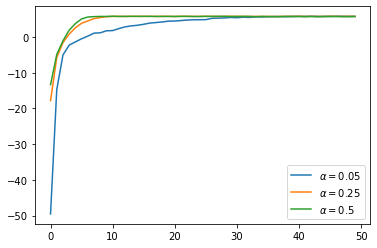

In [4]:
# parameter set with varying alpha

NE=50        # number of epsiodes
NR=1000      # number repetitions of the simulation

# alpha/epsilon parameter values 
alpha=[0.05,0.25,0.5]
epsilon=[0.05,0.05,0.05]

def sarsaSimulation (alpha,epsilon,NE,NR):
    # total reward obtained (epsiode x parameter set x repetition)
    Repisode=np.zeros([NE,len(alpha),NR])

    for j in range(len(alpha)):

        for i in range(NR):

            q=np.random.rand(2,4,4)
            q[1,3,:]=0

            policy=computePolicyFromQ(q)

            # output only in first repetition for first set of parameters        
            if (i==0) & (j==0):
                # show initial policy
                print("Initial random action-value function and policy:")
                showActionValueFunction(q)
                showPolicy(policy)
                print("")

    
            for c in range(NE):    
                # apply SARSA for episode
                policy,q,Repisode[c,j,i]=SARSA(q,alpha[j],epsilon[j])
        
            # output only in first repetition for first set of parameters
            if (i==0) & (j==0):
                print("Final action-value function and policy after %d episodes:" %(NE))
                showActionValueFunction(q)
                showPolicy(policy)
    
    fig, ax = plt.subplots()
    for j in range(len(alpha)):
        ax.plot(np.mean(Repisode[:,j,:],axis=1), label = '$\\alpha = {}$'.format(alpha[j]))
        ax.legend()
    
    
sarsaSimulation(alpha,epsilon,NE,NR)

Initial random action-value function and policy:
( 0.7  0.2  0.0  0.6  ) ( 0.8  0.2  0.1  0.9  ) ( 0.5  0.9  0.9  0.0  ) ( 0.1  0.2  0.7  1.0  ) 
( 0.1  0.0  0.4  0.6  ) ( 0.7  0.1  0.5  0.9  ) ( 0.5  0.6  1.0  0.8  ) ( 0.0  0.0  0.0  0.0  ) 
left up down up
up up right left

Final action-value function and policy after 50 episodes:
( -0.7  -0.6  -0.2  -0.6  ) ( 0.0  0.1  1.9  0.1  ) ( 0.5  5.1  0.9  0.1  ) ( 0.1  0.2  0.7  1.0  ) 
( -0.0  0.0  0.3  -0.0  ) ( 0.5  0.1  2.8  0.5  ) ( 0.5  0.9  8.4  0.8  ) ( 0.0  0.0  0.0  0.0  ) 
right right down up
right right right left


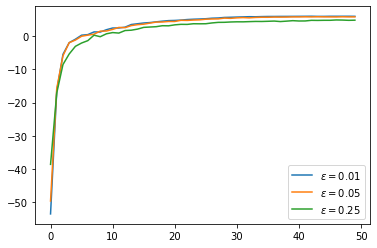

In [5]:
# parameter set with varying epsilon

NE=50        # number of epsiodes
NR=1000      # number repetitions of the simulation

# alpha/epsilon parameter values 
alpha=[0.05,0.05,0.05]
epsilon=[0.01,0.05,0.25]

def sarsaSimulation (alpha,epsilon,NE,NR):
    # total reward obtained (epsiode x parameter set x repetition)
    Repisode=np.zeros([NE,len(alpha),NR])

    for j in range(len(alpha)):

        for i in range(NR):

            q=np.random.rand(2,4,4)
            q[1,3,:]=0

            policy=computePolicyFromQ(q)

            # output only in first repetition for first set of parameters        
            if (i==0) & (j==0):
                # show initial policy
                print("Initial random action-value function and policy:")
                showActionValueFunction(q)
                showPolicy(policy)
                print("")

    
            for c in range(NE):    
                # apply SARSA for episode
                policy,q,Repisode[c,j,i]=SARSA(q,alpha[j],epsilon[j])
        
            # output only in first repetition for first set of parameters
            if (i==0) & (j==0):
                print("Final action-value function and policy after %d episodes:" %(NE))
                showActionValueFunction(q)
                showPolicy(policy)
    
    fig, ax = plt.subplots()
    for j in range(len(alpha)):
        ax.plot(np.mean(Repisode[:,j,:],axis=1), label = '$\\epsilon = {}$'.format(epsilon[j]))
        ax.legend()
    
    
sarsaSimulation(alpha,epsilon,NE,NR)

# Exercise RL6.2:  Successor representation 

Please derive the decomposition of the state value function using the successor representation of the Gridworld example the 'policy 1' introduced in exercise RL3. The states shall be numbered as follows:

(0,0) -> state 1<br>
(0,1) -> state 2<br>
(0,2) -> state 3<br>
(0,3) -> state 4<br>
(1,0) -> state 5<br>
(1,1) -> state 6<br>
(1,2) -> state 7<br>
(1,3) -> state 8 (goal or terminal state)


Next, please derive the decomposition for the same environment and policy but using a discount factor $\gamma < 1$.

At last, please derive the decomposition for 'policy 2' from exercise 3 without discounting (i.e. $\gamma=1.0$).